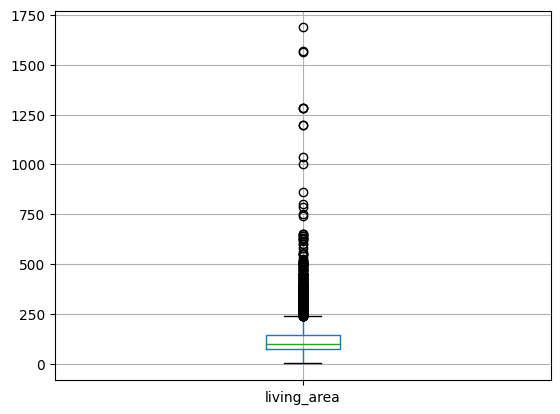

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# # importer
df =pd.read_csv("..\data\cleaned_data.csv",sep=",")
df.head()

df = df[df['living_area'] <= 2000]


# Create box plot for 'price' column
df.boxplot(column='living_area')

# Show plot
plt.show()

In [86]:
# removing bedrooms, liv_room_surf, frontages, bathrooms, id, basement,elevator
# surroundings,flood_zone,heating, showers, toilets, furnished, energy_class, heating,flood_zone
df = df.drop(columns = ["kitchen_type", "status_build","bedrooms", "liv_room_surf", "frontages", "bathrooms", "id", "basement","elevator", "surroundings","flood_zone", "heating", "showers","toilets", "furnished", "heating","flood_zone"])

#dropna living_area, price
df = df.dropna(subset=["living_area", "price"])

#replace swimming_pool None with 0
df["swimming_pool"] = df["swimming_pool"].fillna(0)


print(df.isnull().sum())
print(df)

building_type       0
building_subtype    0
price               0
living_area         0
terrace             0
garden              0
swimming_pool       0
energy_class        0
zipcode             0
municipality        0
province            0
dtype: int64
      building_type building_subtype     price  living_area  terrace  garden   
0         apartment        apartment  210000.0         50.0      0.0     0.0  \
2         apartment        apartment  235000.0         41.0      5.0     0.0   
4         apartment        apartment  235000.0         90.0      7.0     0.0   
5         apartment        apartment  219000.0         70.0      3.0     0.0   
6         apartment        apartment  223000.0        110.0      0.0     0.0   
...             ...              ...       ...          ...      ...     ...   
29764         house            house  180000.0        214.0     15.0     0.0   
29766     apartment        apartment  195000.0         60.0      3.0     0.0   
29767     apartment      

In [94]:
df.head()

,id,building_type,building_subtype,price,living_area,frontages,bedrooms,bathrooms,liv_room_surf,kitchen_type,...,swimming_pool,status_build,furnished,energy_class,heating,flood_zone,surroundings,zipcode,municipality,province
0,10579542,apartment,apartment,210000.0,50.0,2.0,1.0,1.0,NaN,1.0,...,0.0,3.0,NaN,4,Gas,Non flood zone,Urban,1030,Schaerbeek,Brussels Capital Region
1,10470376,house,house,NaN,130.0,3.0,3.0,1.0,28.0,1.0,...,NaN,2.0,NaN,4,Gas,NaN,NaN,4400,Mons-Lez-Liège,Liège
2,10576898,apartment,apartment,235000.0,41.0,2.0,1.0,1.0,22.0,1.0,...,NaN,2.0,1.0,4,Electric,NaN,Urban,9000,Gent,East Flanders
3,10482213,apartment,apartment,NaN,58.0,NaN,1.0,1.0,23.0,0.0,...,NaN,3.0,NaN,6,Gas,NaN,NaN,4040,Herstal,Liège
4,10585245,apartment,apartment,235000.0,90.0,2.0,2.0,1.0,20.0,0.0,...,NaN,2.0,0.0,4,Gas,NaN,"Living area (residential, urban or rural)",1020,Laeken,Brussels Capital Region


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21311 entries, 0 to 29773
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   building_type     21311 non-null  object 
 1   building_subtype  21311 non-null  object 
 2   price             21311 non-null  float64
 3   living_area       21311 non-null  float64
 4   terrace           21311 non-null  float64
 5   garden            21311 non-null  float64
 6   swimming_pool     21311 non-null  float64
 7   energy_class      21311 non-null  object 
 8   zipcode           21311 non-null  int64  
 9   municipality      21311 non-null  object 
 10  province          21311 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 2.0+ MB


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# importer
df =pd.read_csv("..\data\cleaned_data.csv",sep=",")
df.head()


# Calcul du premier et du troisième quartile
Q1 = df['living_area'].quantile(0.25)
Q3 = df['living_area'].quantile(0.75)

# Calcul de l'écart interquartile (IQR)
IQR = Q3 - Q1

# Définition des limites inférieure et supérieure
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Suppression des valeurs aberrantes
df_filtered = df[(df['living_area'] >= lower_bound) & (df['living_area'] <= upper_bound)]

# Affichage du résultat
print(df_filtered)




             id building_type building_subtype     price  living_area   
0      10579542     apartment        apartment  210000.0         50.0  \
1      10470376         house            house       NaN        130.0   
2      10576898     apartment        apartment  235000.0         41.0   
3      10482213     apartment        apartment       NaN         58.0   
4      10585245     apartment        apartment  235000.0         90.0   
...         ...           ...              ...       ...          ...   
29764  10600641         house            house  180000.0        214.0   
29766  10540052     apartment        apartment  195000.0         60.0   
29767  10351028     apartment        apartment  160000.0         65.0   
29768  10469010         house            house  179000.0        175.0   
29773  10568240     apartment        apartment  179965.0         64.0   

       frontages  bedrooms  bathrooms  liv_room_surf  kitchen_type  ...   
0            2.0       1.0        1.0           

In [95]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22417 entries, 0 to 29773
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                22417 non-null  int64  
 1   building_type     22417 non-null  object 
 2   building_subtype  22417 non-null  object 
 3   price             20585 non-null  float64
 4   living_area       22417 non-null  float64
 5   frontages         16575 non-null  float64
 6   bedrooms          21683 non-null  float64
 7   bathrooms         18815 non-null  float64
 8   liv_room_surf     10784 non-null  float64
 9   kitchen_type      14191 non-null  float64
 10  showers           5124 non-null   float64
 11  toilets           16755 non-null  float64
 12  basement          8051 non-null   float64
 13  terrace           22417 non-null  float64
 14  garden            22417 non-null  float64
 15  elevator          9698 non-null   float64
 16  swimming_pool     6562 non-null   float64
 17

In [96]:
df_filtered.head()

,id,building_type,building_subtype,price,living_area,frontages,bedrooms,bathrooms,liv_room_surf,kitchen_type,...,swimming_pool,status_build,furnished,energy_class,heating,flood_zone,surroundings,zipcode,municipality,province
0,10579542,apartment,apartment,210000.0,50.0,2.0,1.0,1.0,NaN,1.0,...,0.0,3.0,NaN,4,Gas,Non flood zone,Urban,1030,Schaerbeek,Brussels Capital Region
1,10470376,house,house,NaN,130.0,3.0,3.0,1.0,28.0,1.0,...,NaN,2.0,NaN,4,Gas,NaN,NaN,4400,Mons-Lez-Liège,Liège
2,10576898,apartment,apartment,235000.0,41.0,2.0,1.0,1.0,22.0,1.0,...,NaN,2.0,1.0,4,Electric,NaN,Urban,9000,Gent,East Flanders
3,10482213,apartment,apartment,NaN,58.0,NaN,1.0,1.0,23.0,0.0,...,NaN,3.0,NaN,6,Gas,NaN,NaN,4040,Herstal,Liège
4,10585245,apartment,apartment,235000.0,90.0,2.0,2.0,1.0,20.0,0.0,...,NaN,2.0,0.0,4,Gas,NaN,"Living area (residential, urban or rural)",1020,Laeken,Brussels Capital Region


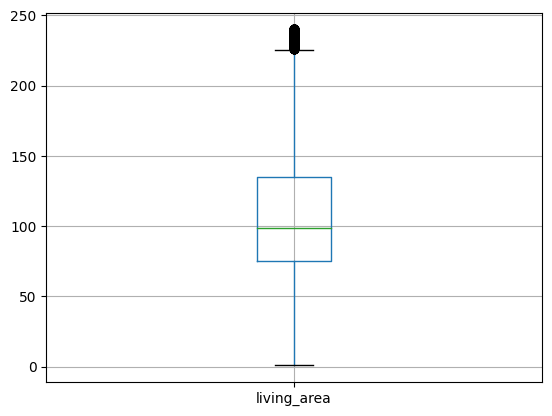

In [102]:
# Create box plot for 'price' column
df_filtered.boxplot(column='living_area')

# Show plot
plt.show()

In [103]:
plt.scatter(df_filtered['living_area'],df_filtered['price'])

In [100]:
from sklearn import metrics

print('R²:', metrics.r2_score(df_filtered['living_area'],df_filtered['price']))

ValueError: Input contains NaN.